In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from feature_selector import FeatureSelector
from matplotlib import pyplot as plt

In [2]:
# Load data
data = pd.read_csv("../data/output.csv")
data.dropna(inplace=True)

In [3]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
#print(X.head(5))
#print(y.head(5))

In [4]:
y.max()

9.5

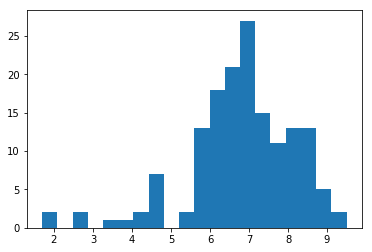

In [5]:
# Histogram of the data
plt.hist(y, bins=20)
plt.show()

In [6]:
for i in range(len(y)):
    if y[i] < 5: 
        y[i] = 0
    elif y[i] < 7.5:
        y[i] = 1
    else: 
        y[i] = 2

/home/mario/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/mario/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mario/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
data.columns.values

array(['Idusuario', 'period1_Actividad reciente vis',
       'period1_Algún contenido ha sid', 'period1_Capítulo visto',
       'period1_Comentario creado', 'period1_Comentario eliminado',
       'period1_Consulta respondida', 'period1_Curso actualizado',
       'period1_Curso buscado', 'period1_Curso visto',
       'period1_Entrega creada.', 'period1_Envío actualizado.',
       'period1_Finalización de curso ', 'period1_Formulario de califica',
       'period1_Formulario de entrega ', 'period1_Ha comenzado el intent',
       'period1_Informe de Consulta vi', 'period1_Informe de notas de us',
       'period1_Informe de resumen de ', 'period1_Informe del examinador',
       'period1_Informe del usuario vi', 'period1_Informe usuario del cu',
       'period1_Instancia del módulo d', 'period1_Intento de cuestionari',
       'period1_Intento del cuestionar', 'period1_Intento enviado',
       'period1_Las entregas se han de', 'period1_Lista de usuarios vist',
       'period1_Los envíos han s

In [8]:
data[["FINAL", "Idusuario"]].groupby('FINAL').count()

,Idusuario
FINAL,
0.0,15
1.0,95
2.0,45


In [9]:
#data.head(5)
print(f"Number of rows: {len(data.index)}.")

Number of rows: 155.


In [10]:
# print(*list(enumerate(X.columns.values)), sep="\n")
print(f"Number of features: {len(X.columns.values)}.")

Number of features: 107.


In [11]:
model = SVC(gamma='auto', C=0.7)
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(scores.mean())

model = SVC(gamma='auto', C=1)
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(scores.mean())

model = SVC(gamma='auto', C=2)
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(scores.mean())

0.6129032258064516
0.6193548387096774
0.6064516129032257


In [12]:
forest = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(forest, X, y, cv=5, scoring="accuracy")
scores.mean()

0.5741935483870967

In [13]:
# Using one versus rest
model = OneVsRestClassifier(SVC(C=0.7))
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mario/miniconda3/lib/python3.6/site-packages/skle

0.6129032258064516

In [14]:
fs = FeatureSelector(data = X, labels = y)

In [15]:
fs.identify_single_unique()
#s.ops["single_unique"]

35 features with a single unique value.



In [16]:
fs.unique_stats

,nunique
period2_Contenido del curso el,1
period1_Módulo de curso creado,1
period1_Módulo de curso elimin,1
period1_Quiz report viewed,1
period1_Rol asignado,1
period1_Sección de curso actua,1
period1_Suscripción activada,1
period1_Usuario matriculado en,1
period1_Vista previa del inten,1
period1_Visualización de las C,1


13 features with a correlation magnitude greater than 0.95.



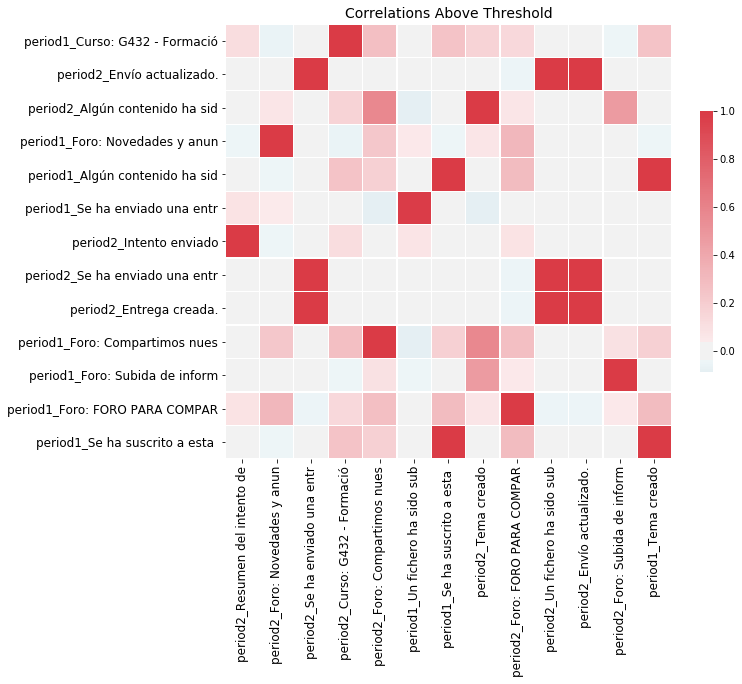

In [17]:
fs.identify_collinear(correlation_threshold=0.95)
fs.plot_collinear()

In [18]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


80 features with zero importance after one-hot encoding.



In [19]:
fs.identify_low_importance(cumulative_importance = 0.99)
low_importance_features = fs.ops['low_importance']
#low_importance_features

22 features required for cumulative importance of 0.99 after one hot encoding.
85 features do not contribute to cumulative importance of 0.99.



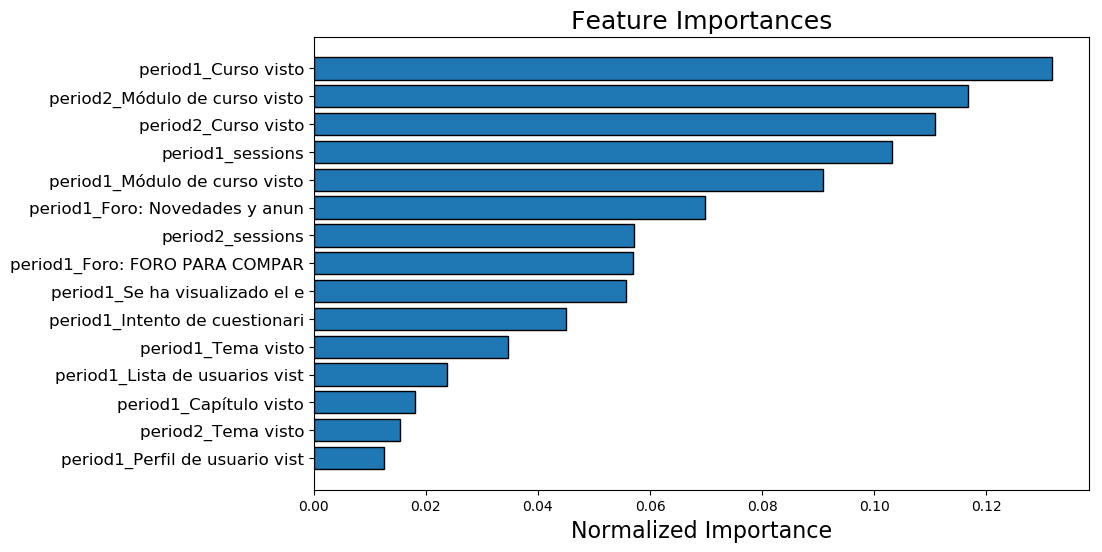

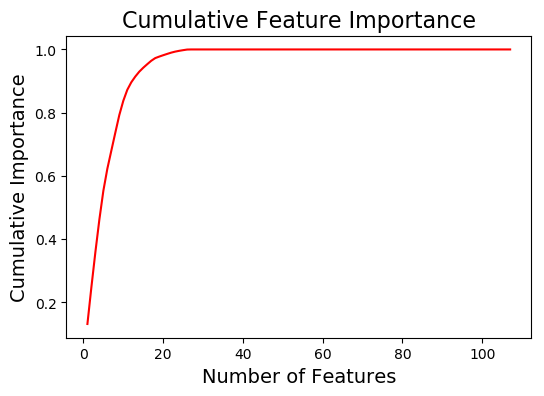

In [20]:
fs.plot_feature_importances()

In [21]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,period1_Curso visto,1990.0,0.131675,0.131675
1,period2_Módulo de curso visto,1765.0,0.116787,0.248462
2,period2_Curso visto,1674.0,0.110766,0.359227
3,period1_sessions,1558.0,0.103090,0.462317
4,period1_Módulo de curso visto,1372.0,0.090783,0.553100
5,period1_Foro: Novedades y anun,1055.0,0.069807,0.622907
6,period2_sessions,863.0,0.057103,0.680011
7,period1_Foro: FORO PARA COMPAR,861.0,0.056971,0.736981
8,period1_Se ha visualizado el e,841.0,0.055647,0.792629
9,period1_Intento de cuestionari,680.0,0.044994,0.837623


In [22]:
selected = X.loc[:, fs.feature_importances["feature"][:10]]
model = SVC(gamma='auto')
scores = cross_val_score(model, selected, y, cv=5, scoring="accuracy")
print(scores.mean())

0.6129032258064516


In [23]:
# Using sklearn for the same purpose
selected = SelectKBest(chi2, k=10).fit_transform(X, y)
model = SVC(gamma='auto')
scores = cross_val_score(model, selected, y, cv=5, scoring="accuracy")
print(scores.mean())

0.6129032258064516


In [24]:
# Confusion matrix for overfitted model
model = SVC(gamma='auto')
y_pred = model.fit(X, y).predict(X)
print(model.score(X, y))
confusion_matrix(y, y_pred)

0.9612903225806452


array([[10,  5,  0],
       [ 0, 95,  0],
       [ 0,  1, 44]])

In [25]:
model = SVC(gamma='auto')
results = cross_validate(model, X, y, n_jobs=-1, return_estimator=True, cv = 10)

In [26]:
results

/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00829029, 0.00793791, 0.00614619, 0.00850224, 0.00611711,
        0.00862408, 0.00642157, 0.00868368, 0.00868416, 0.00644898]),
 'score_time': array([0.0021503 , 0.00211501, 0.00138688, 0.00216246, 0.0014708 ,
        0.00209761, 0.00140738, 0.00210881, 0.00210857, 0.0014255 ]),
 'estimator': (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001,

In [27]:
matrices = []
for estimator in results['estimator']:
    matrices.append(confusion_matrix(y, estimator.predict(X)))
print(np.sum(matrices, axis=0))

[[ 91  59   0]
 [  0 950   0]
 [  0  51 399]]


In [28]:
X.iloc[[2,3,4]]

,period1_Actividad reciente vis,period1_Algún contenido ha sid,period1_Capítulo visto,period1_Comentario creado,period1_Comentario eliminado,period1_Consulta respondida,period1_Curso actualizado,period1_Curso buscado,period1_Curso visto,period1_Entrega creada.,...,period1_Foro: Novedades y anun,period1_Foro: Subida de inform,period1_Otro,period2_Curso: G432 - Formació,period2_Foro: Compartimos nues,period2_Foro: DEBATIENDO EL DI,period2_Foro: FORO PARA COMPAR,period2_Foro: Novedades y anun,period2_Foro: Subida de inform,period2_Otro
2,0,0,1,0,0,0,0,0,33,0,...,2,0,0,0,0,0,0,2,0,0
3,0,0,1,0,0,0,0,0,28,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,9,0,...,2,0,0,0,0,0,0,2,0,0


In [33]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)
X_std

/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.26234793, -0.0805823 ,  1.57011284, ..., -0.53290791,
        -0.35828207,  0.        ],
       [-0.26234793, -0.0805823 , -0.72148311, ..., -0.23362992,
        -0.35828207,  0.        ],
       [-0.26234793, -0.0805823 , -0.26316392, ..., -0.23362992,
        -0.35828207,  0.        ],
       ...,
       [-0.26234793, -0.0805823 , -0.26316392, ..., -0.53290791,
        -0.35828207,  0.        ],
       [ 3.27364594, -0.0805823 , -0.72148311, ...,  0.36492607,
        -0.35828207,  0.        ],
       [-0.26234793, -0.0805823 , -0.72148311, ..., -0.83218591,
        -0.35828207,  0.        ]])

In [32]:
skf = StratifiedKFold(n_splits=5)
matrices = []
for train_index, test_index in skf.split(X, y):
    model = SVC(gamma='auto', class_weight='balanced')
    y_pred = model.fit(X.iloc[train_index], y[train_index]).predict(X.iloc[test_index])
    print(model.score(X.iloc[test_index], y[test_index]))
    matrices.append(confusion_matrix(y[test_index], y_pred))
print(np.sum(matrices, axis=0))

0.5483870967741935
0.5806451612903226
0.6129032258064516
0.5806451612903226
0.5806451612903226
[[ 0 14  1]
 [ 4 85  6]
 [ 1 39  5]]


In [35]:
skf = StratifiedKFold(n_splits=5)
matrices = []
for train_index, test_index in skf.split(X, y):
    model = SVC(gamma='auto')
    y_pred = model.fit(X_std[train_index], y[train_index]).predict(X_std[test_index])
    print(model.score(X_std[test_index], y[test_index]))
    matrices.append(confusion_matrix(y[test_index], y_pred))
print(np.sum(matrices, axis=0))

0.6129032258064516
0.6129032258064516
0.6129032258064516
0.5806451612903226
0.6129032258064516
[[ 0 15  0]
 [ 0 94  1]
 [ 0 45  0]]
